## Security analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")


C:\Users\Famiglia\AppData\Local\Temp\ipykernel_9472\3971459550.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Token Type')


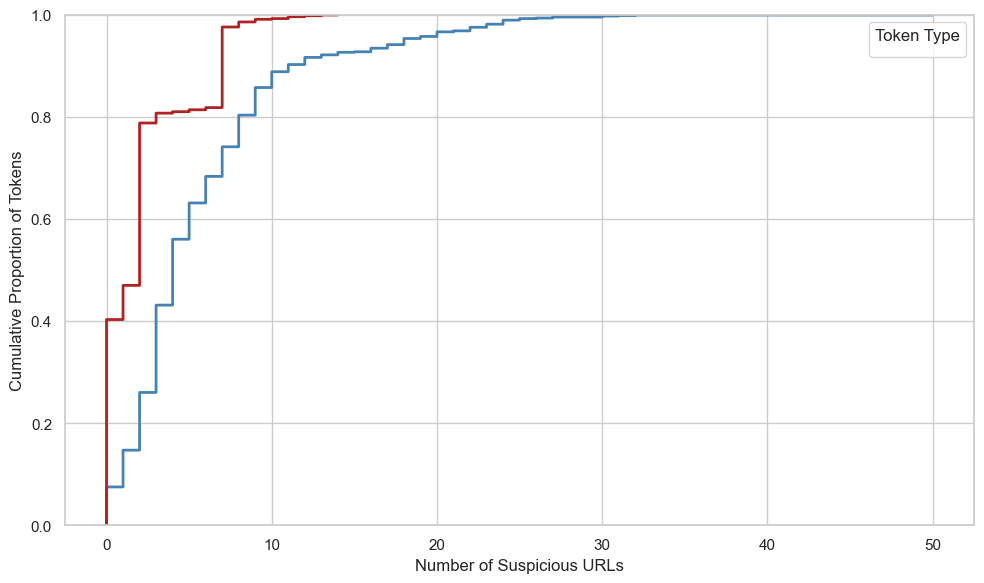

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Add a column to identify the group
df_bad['type'] = 'Bad Token'
df_good['type'] = 'Good Token'

# Combine the two DataFrames
df_combined = pd.concat([df_bad, df_good], ignore_index=True)

# Ensure the relevant column is numeric
df_combined['howmany_suspicious_urls'] = pd.to_numeric(df_combined['howmany_suspicious_urls'], errors='coerce').fillna(0).astype(int)

# Set plot style
sns.set_theme(style='whitegrid')

# Create the CDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(
    data=df_combined,
    x='howmany_suspicious_urls',
    hue='type',
    palette={'Bad Token': 'firebrick', 'Good Token': 'steelblue'},
    linewidth=2
)

# Set labels and title
plt.xlabel('Number of Suspicious URLs')
plt.ylabel('Cumulative Proportion of Tokens')
plt.grid(True)
plt.legend(title='Token Type')
plt.tight_layout()
plt.savefig("suspicious_urls.pdf",format="pdf")
plt.show()


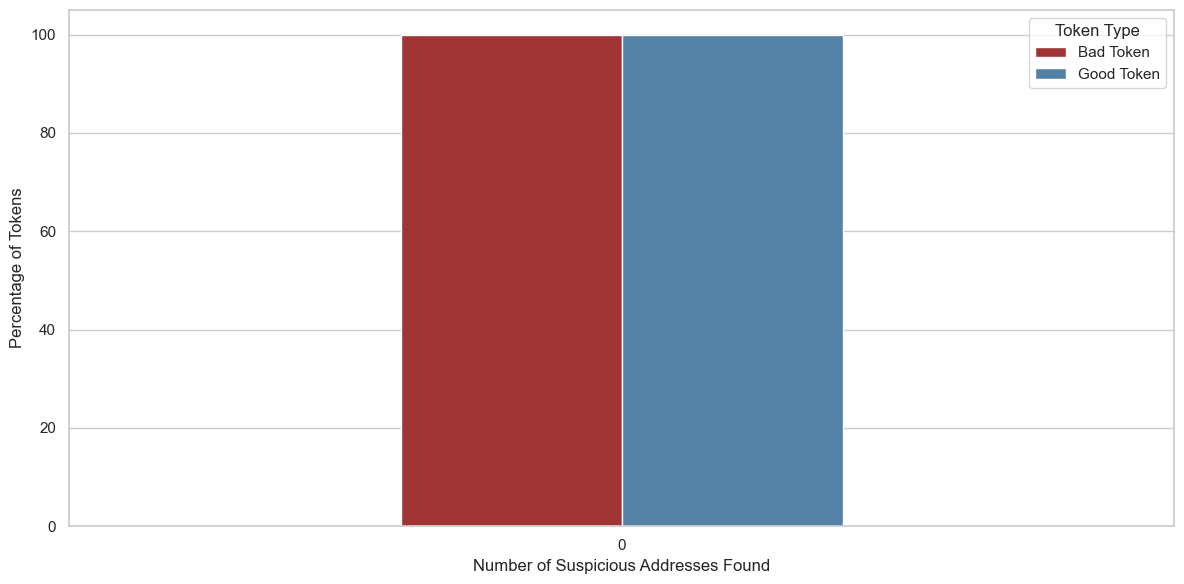

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Label each dataset
df_bad['type'] = 'Bad Token'
df_good['type'] = 'Good Token'

# Combine the datasets
df_combined = pd.concat([df_bad, df_good], ignore_index=True)

# Ensure the suspicious address count is numeric
df_combined['howmany_suspicious_addresses'] = pd.to_numeric(
    df_combined['howmany_suspicious_addresses'], errors='coerce'
).fillna(0).astype(int)

# Calculate percent of tokens per category and address count
grouped = (
    df_combined
    .groupby(['type', 'howmany_suspicious_addresses'])
    .size()
    .reset_index(name='count')
)

# Get total counts for each token type
totals = grouped.groupby('type')['count'].transform('sum')
grouped['percent'] = (grouped['count'] / totals) * 100

# Set seaborn theme
sns.set_theme(style='whitegrid')

# Create the percentage bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='howmany_suspicious_addresses',
    y='percent',
    hue='type',
    width=0.4,
    palette={'Bad Token': 'firebrick', 'Good Token': 'steelblue'}
)

# Set titles and labels
plt.xlabel('Number of Suspicious Addresses Found')
plt.ylabel('Percentage of Tokens')
plt.legend(title='Token Type')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("suspicious.pdf",format="pdf")
plt.show()


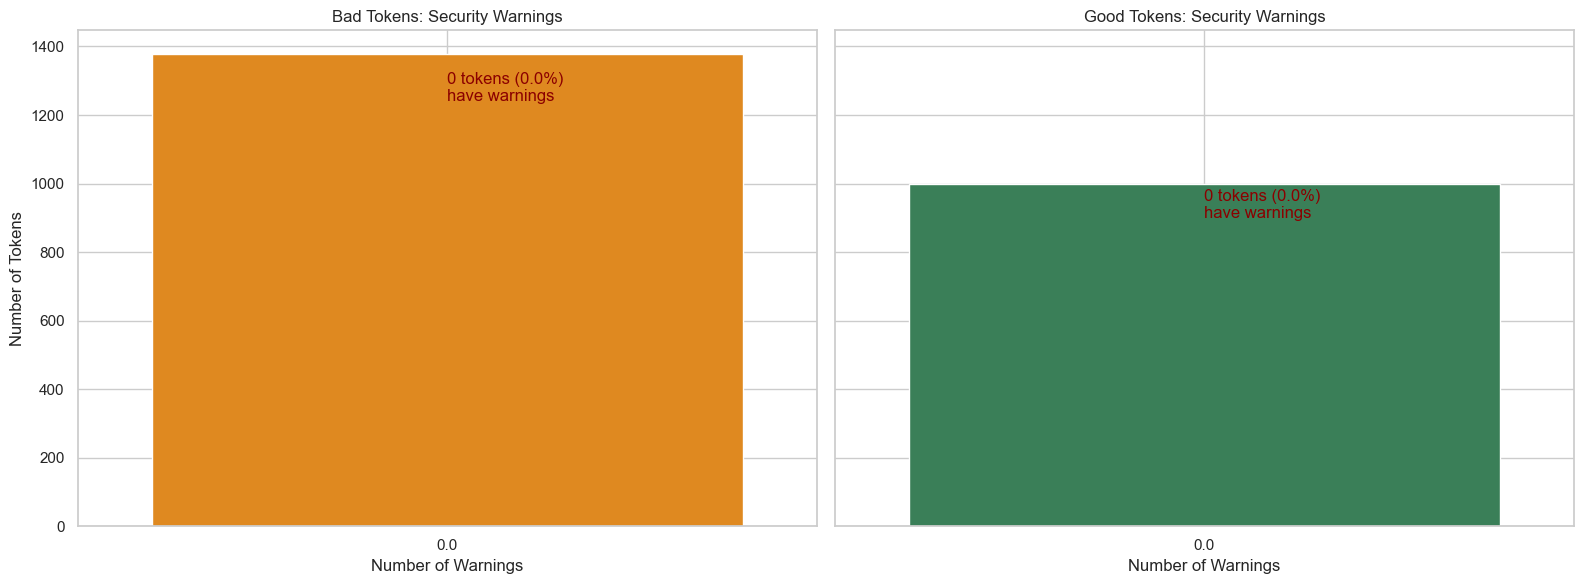

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Function to plot warnings
def plot_warnings(ax, df, title, bar_color):
    # Binary flag for having warnings
    df['has_warnings'] = df['howmany_warnings'] > 0

    # Count exact occurrences
    warning_counts = df['howmany_warnings'].value_counts().sort_index()

    # Count binary presence
    num_with = df['has_warnings'].sum()
    num_total = df.shape[0]
    percent_with = (num_with / num_total) * 100

    # Plot barplot
    sns.barplot(x=warning_counts.index, y=warning_counts.values, color=bar_color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Number of Warnings')
    ax.set_ylabel('Number of Tokens')
    ax.grid(True)

    # Annotate
    if len(warning_counts) > 0:
        ax.text(
            x=max(warning_counts.index) * 0.6,
            y=max(warning_counts.values) * 0.9,
            s=f"{num_with} tokens ({percent_with:.1f}%)\nhave warnings",
            fontsize=12,
            color='darkred'
        )

# Plot for bad tokens
plot_warnings(
    ax=axes[0],
    df=df_contract_bad.copy(),
    title='Bad Tokens: Security Warnings',
    bar_color='darkorange'
)

# Plot for good tokens
plot_warnings(
    ax=axes[1],
    df=df_contract_good.copy(),
    title='Good Tokens: Security Warnings',
    bar_color='seagreen'
)

# Finalize layout
plt.tight_layout()
plt.show()
